<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Bioinformatics/blob/master/oric_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/positive-sequences.txt
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/negative-sequences.txt
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/90_sdandard.txt

--2021-04-23 16:43:35--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/positive-sequences.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123928 (121K) [text/plain]
Saving to: ‘positive-sequences.txt’

positive-sequences. 100%[===================>] 121.02K  --.-KB/s    in 0.008s  

2021-04-23 16:43:35 (14.4 MB/s) - ‘positive-sequences.txt’ saved [123928/123928]

--2021-04-23 16:43:35--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Bioinformatics/master/negative-sequences.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, await

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
import tensorflow as tf

In [3]:
positive_sequences=open("/content/positive-sequences.txt","r")
negative_sequences=open("/content/negative-sequences.txt","r")

In [4]:
p_data=positive_sequences.readlines()
n_data=negative_sequences.readlines()

In [5]:
p_data=p_data[1::2]
n_data=n_data[1::2]

In [192]:
p=[]
n=[]
size=2
for i in p_data:
  text=i.rstrip("\n")
  holder=""
  for j in range(0,len(text)-size):
    holder+=text[j:j+size]+" "
  p.append(holder)
for i in n_data:
  text=i.rstrip("\n")
  holder=""
  for j in range(0,len(text)-size):
    holder+=text[j:j+size]+" "
  n.append(holder)

In [193]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()

In [194]:
len(p+n),len(p),len(n)

(811, 405, 406)

In [195]:
p

['C T G C C C T T A A T A C A T A C G T T A T A C C A C T T T T G C A C C A T A T A C T T A C C A C T C C A T T T A T A T A C A C T T A T G T C A A T A T T A C A G A A A A A T C C C C A C A A A A A T C A C C T A A A C A T A A A A A T A T T C T A C T T T T C A A C A A T A A T A C A T A A A C A T A T T G G C T T G T G G T A G C A A C A C T A T C A T G G T A T C A C T A A C G T A A A A G T T C C T C A A T A T T G C A A T T T G C T T G A A C G G A T G C T A T T T C A G A A T A T T T C G T A C T T A C A C A G G C C A T A C A T T A G A A T A A T A T G T C A C A T C A C T G T C G T A A C A C T C T T ',
 'G T T G A T T A G T A C T G T T G G T C T C T C A T T G A A A T T T T A C G T G A C A C C A T C A T T T T A C T T C C A C A T A A G T T C T A A T G T T A C G T A G T T C A A T T T T A G T C G A C C T A G C T T C A T A T T T A T T T T A G A A G C A A T T C G T A A T T A T C A T T T T G C T T T C G A A G A A A A T T A A G A C T T C A T T T A C T A T T C T C G T G A T A T T T T A G T A G G C G C

In [196]:
tokenizer.fit_on_texts(p+n)

In [197]:
tokenizer.word_index

{'a': 2, 'c': 4, 'g': 3, 't': 1}

In [198]:
sequences=tokenizer.texts_to_sequences(p+n)

In [199]:
y=[]
for i in range(len(p)):
  y.append(1.0)
for i in range(len(n)):
  y.append(0.0)

In [200]:
from sklearn.utils import shuffle

In [201]:
sequences,y=shuffle(sequences,y)

In [202]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(sequences,y)

In [203]:
vocab_size=len(p+n)
embedding_dim=30
max_length=len(p[0])

In [204]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [205]:
# Implement callback function to stop training
# when accuracy reaches e.g. ACCURACY_THRESHOLD = 0.95
ACCURACY_THRESHOLD = 0.8
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('acc') > ACCURACY_THRESHOLD):   
          self.model.stop_training = True

In [206]:
callbacks = myCallback()

In [207]:
from tensorflow.keras import backend as K
def error(y_true,y_pred):
  return K.dot(1 - y_true,tf.transpose(y_pred))

In [208]:
model=tf.keras.Sequential([
  tf.keras.layers.Embedding(len(tokenizer.word_index)+1, embedding_dim),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10)),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, None, 30)          150       
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 20)                3280      
_________________________________________________________________
dense_63 (Dense)             (None, 100)               2100      
_________________________________________________________________
dense_64 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_65 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 101       
Total params: 25,831
Trainable params: 25,831
Non-trainable params: 0
_________________________________________________

In [209]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=31,verbose=1)

Epoch 1/31
19/19 [==============================] - 5s 143ms/step - loss: 0.6936 - accuracy: 0.4701 - val_loss: 0.6930 - val_accuracy: 0.5123
Epoch 2/31
19/19 [==============================] - 2s 94ms/step - loss: 0.6928 - accuracy: 0.5321 - val_loss: 0.6931 - val_accuracy: 0.4778
Epoch 3/31
19/19 [==============================] - 2s 93ms/step - loss: 0.6917 - accuracy: 0.5336 - val_loss: 0.6913 - val_accuracy: 0.5714
Epoch 4/31
19/19 [==============================] - 2s 92ms/step - loss: 0.6898 - accuracy: 0.5922 - val_loss: 0.6874 - val_accuracy: 0.5468
Epoch 5/31
19/19 [==============================] - 2s 92ms/step - loss: 0.6823 - accuracy: 0.5513 - val_loss: 0.6789 - val_accuracy: 0.5961
Epoch 6/31
19/19 [==============================] - 2s 93ms/step - loss: 0.6658 - accuracy: 0.6048 - val_loss: 0.6718 - val_accuracy: 0.6010
Epoch 7/31
19/19 [==============================] - 2s 92ms/step - loss: 0.6156 - accuracy: 0.6850 - val_loss: 0.6259 - val_accuracy: 0.6995
Epoch 8/31
1

In [210]:
len(x_train),len(y_train)

(608, 608)

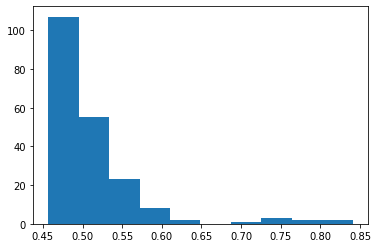

In [211]:
plt.hist(model.predict(x_test))
plt.show()

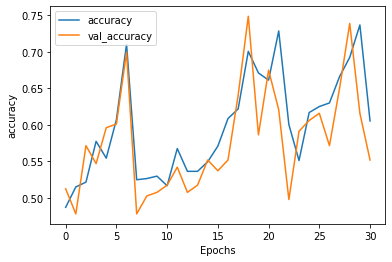

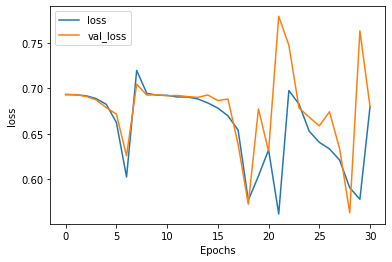

In [212]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [188]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) 

(65, 30)


In [189]:
wi=tokenizer.word_index
keys=list(wi.keys())
decode=dict()
val=list(wi.values())
j=0
for i in val:
  decode[i]=keys[j]
  j+=1

In [190]:
import io
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1,len(tokenizer.word_index)+1):
  word = decode[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [191]:
from google.colab import files
files.download('vecs.tsv')
files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
model.save("model_LSTM(3).h5")